# Aprendizado de Máquina
__UFRJ-Macaé__

__Pedro Andrietta Chagas__

## Reconhecendo Letras

Primeiro precisamos importar as bibliotecas que iremos utilizar:

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import seaborn as sns

from matplotlib.image import imread 
from PIL import Image

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import KFold, train_test_split
from sklearn import cluster
import xgboost as xgb

In [83]:
def jupyter_settings():
    %matplotlib inline

    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24

    display(HTML('<style>.conteiner{width:100% !important;}</style>'))

    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    # configura o pandas para quantidade de casas decimeis
    pd.set_option('display.float_format', lambda x: '%.2f' % x)

    sns.set()
jupyter_settings()

### 1 - Coletar os dados

In [84]:
path = 'letter_data.csv'
def collect_data(path):
    conjuntoDados = pd.read_csv('letter_data.csv')
    conjuntoDados.drop(columns='Unnamed: 0', inplace=True)
    conjuntoDados.label = conjuntoDados.label.astype(str)
    return conjuntoDados
conjuntoDados = collect_data(path)

### 2 - Explorar os dados

Vamos explorar algumas coisas no conjunto de dados:

1. Quantos exemplos o conjunto de dados possui?

In [85]:
num_exemplo = conjuntoDados['label'].count()
print(f'No conjunto de dados existem {num_exemplo} exemplos')

No conjunto de dados existem 3410 exemplos


2. Quantos exemplos cada classe possui?

In [86]:
num_classes = len(conjuntoDados.label.unique())
print(f'Existem {num_classes} classes distintas')

Existem 62 classes distintas


In [87]:
num_exemplo = int(conjuntoDados.label.value_counts().unique())
print(f'Cada classe possui {num_exemplo} exemplos')

Cada classe possui 55 exemplos


3. Quais são os dígitos que estamos tentando reconhecer?

In [88]:
print('Os dígitos são:')
labels = conjuntoDados.label.unique()
print(labels)

Os dígitos são:
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


Vamos olhar um exemplo de cada dígito:

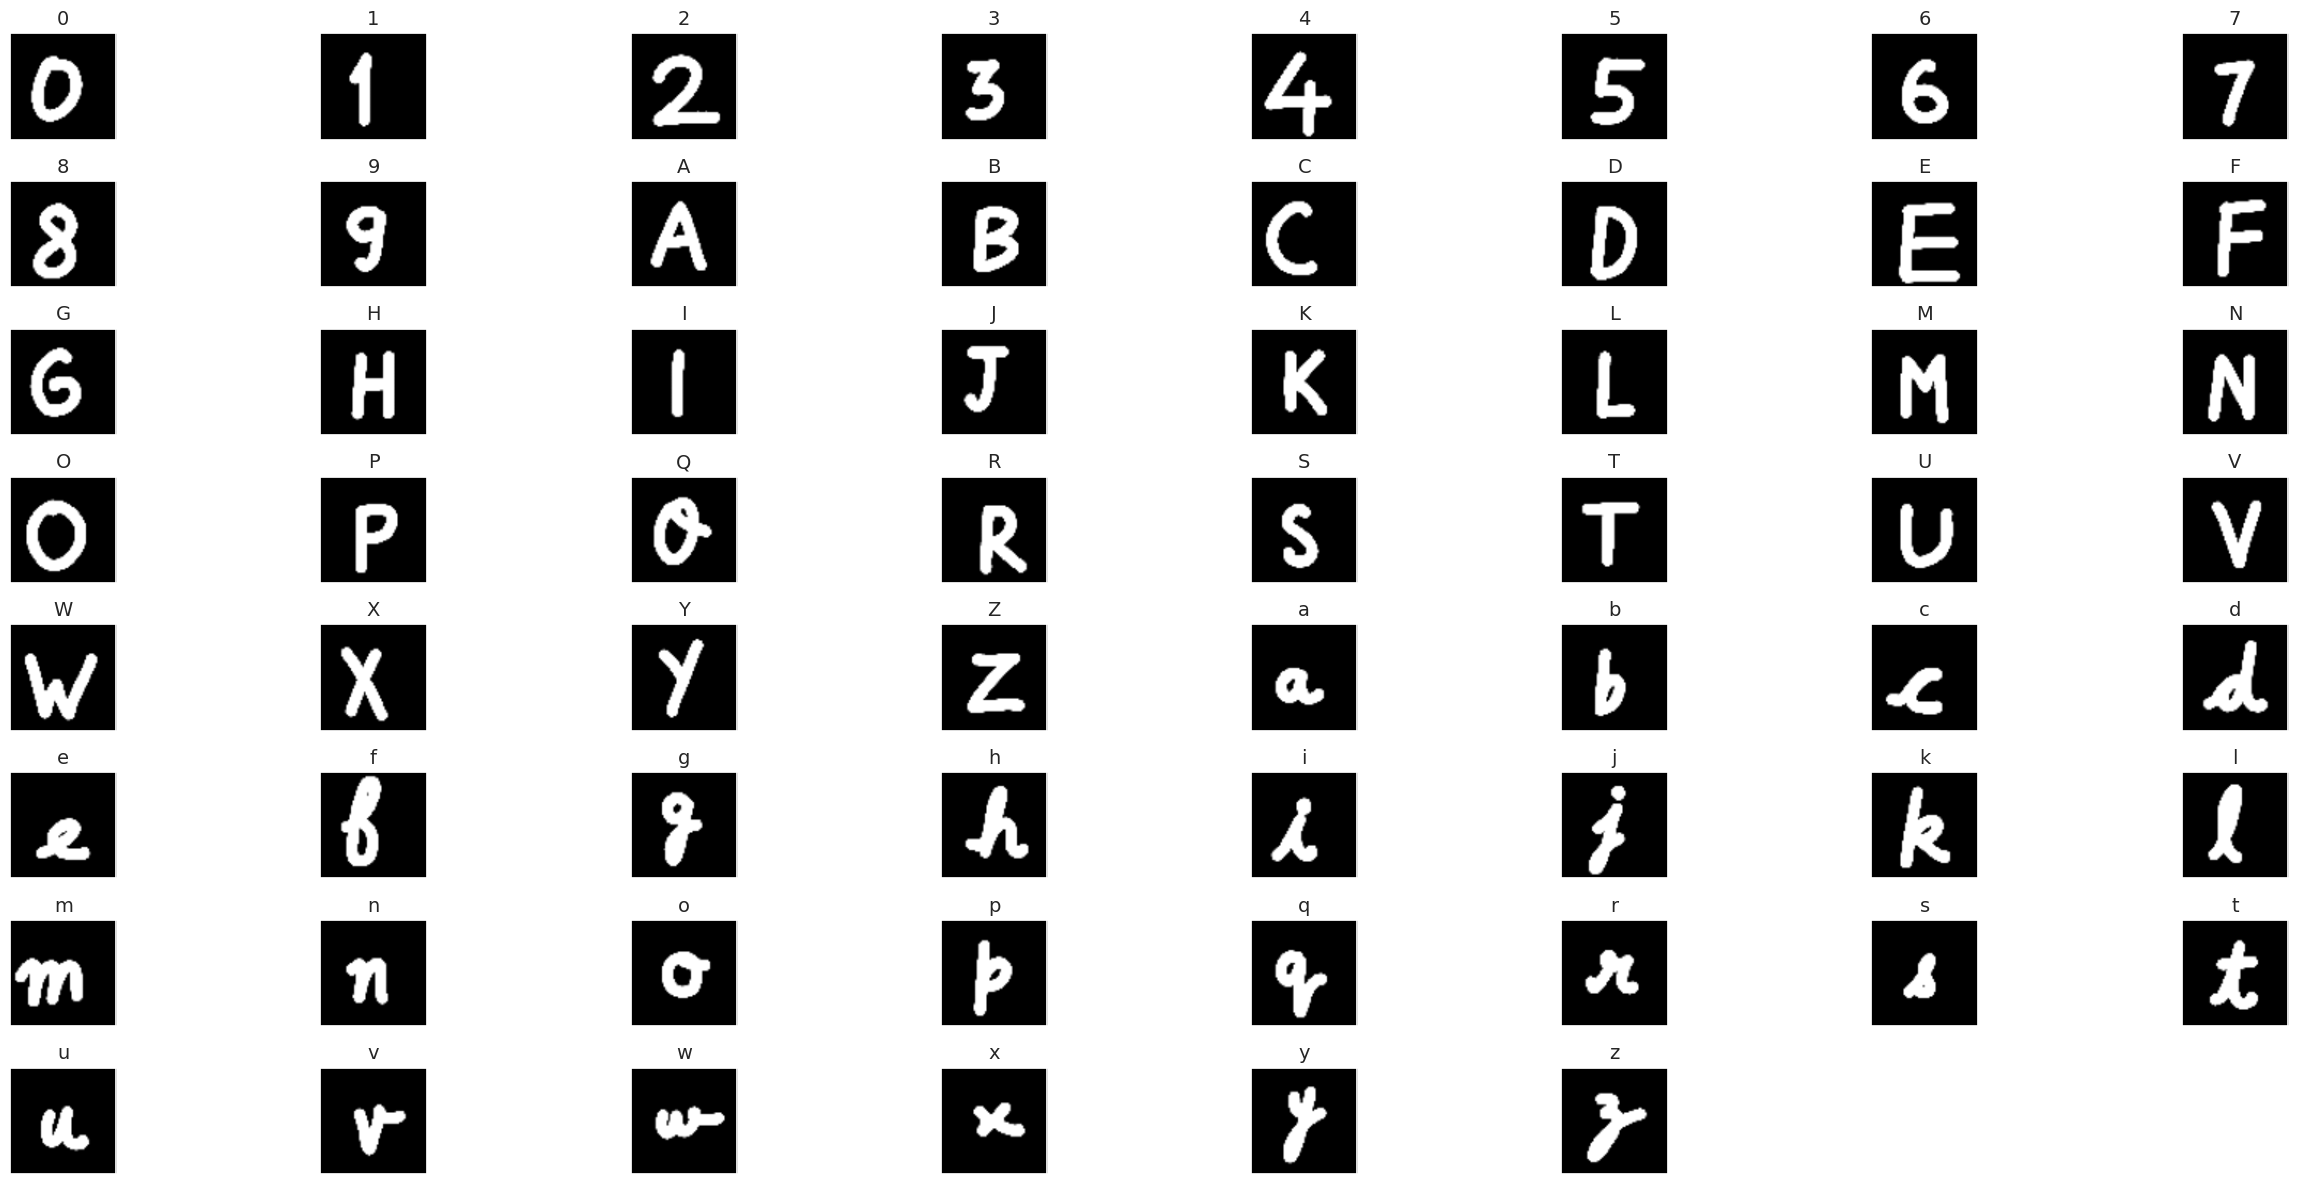

In [89]:
num_classes = len(conjuntoDados.label.unique())
classes = [i for i in conjuntoDados['label'].unique()]
for i, classe in enumerate(classes):
    img_data = conjuntoDados[conjuntoDados['label'] == classe].iloc[1,1:]
    plt.subplot(8, 8, 1 + i)
    plt.imshow(np.array(img_data.to_list()).reshape(100,100), cmap=plt.cm.binary)
    plt.title(classe, fontsize=14)
    ax= plt.gca()
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
plt.tight_layout()
plt.show()

### 3 - Construir/Escolher Modelo

Vamos usar o classificador *Support Vector Classifier* (SVC) e fazer separação linear

In [90]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

### 4 - Treinar o Modelo

Primeiro vamos separar o conjunto de dados em dois: **80%** dos dados serão utilizados para o **treino** e **20%** para o **teste**

In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def split_data(df):
    le = LabelEncoder()
    df.label = le.fit_transform(df.label)
    training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)
    treinoFeatures,treinoClasses = training_data.drop(columns='label').values, training_data['label'].values
    testeFeatures,testeClasses = testing_data.drop(columns='label'), testing_data['label'].values
    return treinoFeatures, treinoClasses, testeFeatures, testeClasses 
treinoFeatures, treinoClasses, testeFeatures, testeClasses = split_data(conjuntoDados)

Agora iremos treinar o classificador com os dados de treino

In [92]:
#from sklearn.model_selection import GridSearchCV
#param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
#grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3, n_jobs=-1)
#grid.fit(treinoFeatures,treinoClasses)
#print(grid.best_estimator_)
params = {'C': 0.1, 'gamma': 1,'kernel': 'poly'}

In [93]:
model = SVC(**params)
model.fit(treinoFeatures,treinoClasses)

SVC(C=0.1, gamma=1, kernel='poly')

### 5 - Testar e avaliar os resultados

In [94]:
testePrevisao = model.predict(testeFeatures)
print(metrics.classification_report(testeClasses,testePrevisao))

              precision    recall  f1-score   support

           0       0.33      0.45      0.38        11
           1       0.25      0.50      0.33        10
           2       0.33      0.33      0.33         9
           3       0.44      0.29      0.35        14
           4       0.25      0.33      0.29        12
           5       0.30      0.38      0.33         8
           6       0.40      0.25      0.31        16
           7       0.54      0.44      0.48        16
           8       0.46      0.55      0.50        11
           9       0.55      0.60      0.57        10
          10       0.67      0.73      0.70        11
          11       0.31      0.45      0.37        11
          12       0.62      0.83      0.71         6
          13       0.50      0.44      0.47         9
          14       0.56      0.62      0.59         8
          15       0.50      0.50      0.50         8
          16       0.62      0.45      0.53        11
          17       0.40    

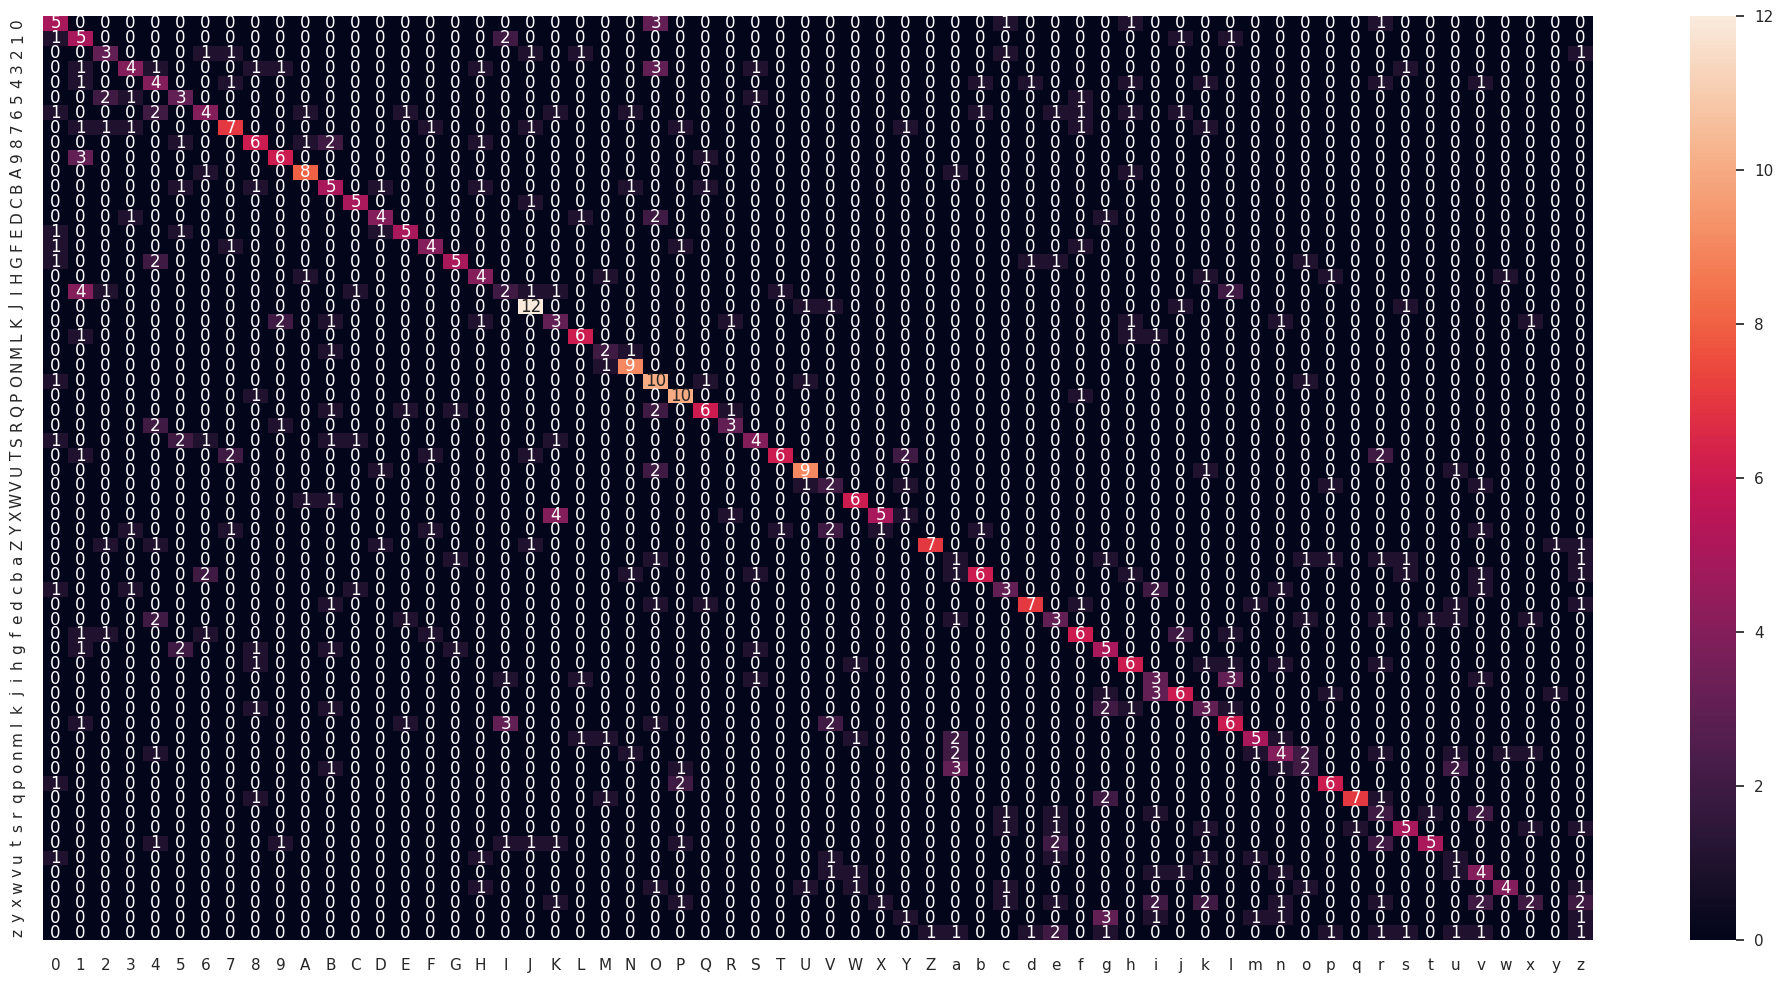

In [104]:
#Observa o resultado gerado pelo classificador
matrizConfusao = metrics.confusion_matrix(testeClasses,testePrevisao)
sns.heatmap(matrizConfusao, annot=True, xticklabels=labels, yticklabels=labels);

### Experimento 2 - K-Means Clustering (Não Supervisionado)

In [96]:
estimador = cluster.KMeans(n_clusters=num_classes)

treinoFeatures = conjuntoDados.iloc[:,1:]
clusters = estimador.fit_predict(treinoFeatures)
estimador.cluster_centers_.shape

(62, 10000)

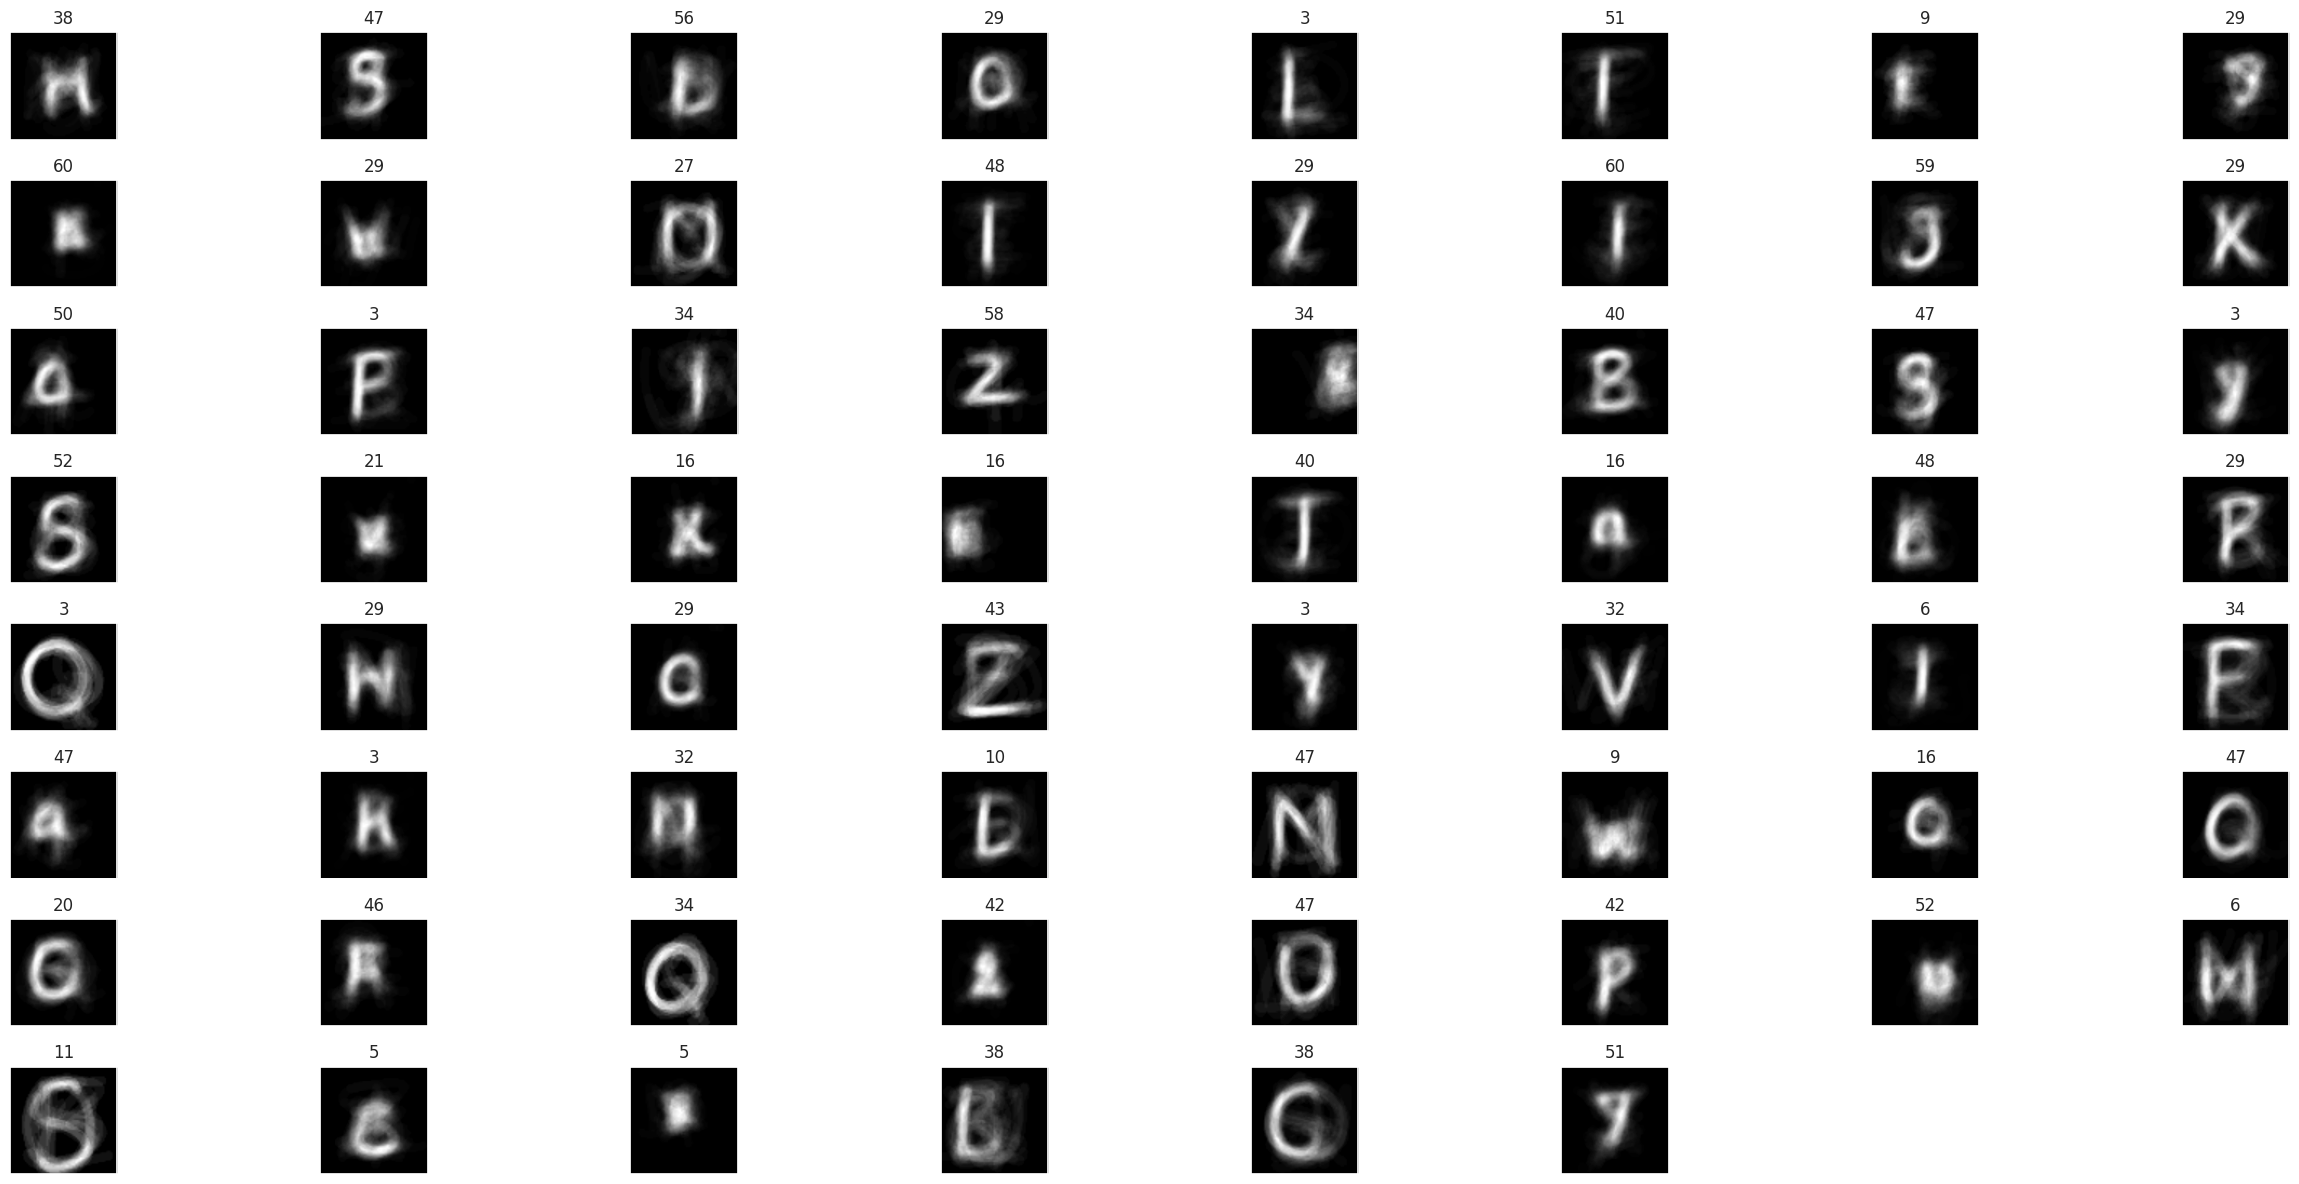

In [97]:
for i in range(num_classes):
    dim = np.sqrt(num_classes)
    plt.subplot(8, 8, 1 + i)
    plt.imshow(estimador.cluster_centers_[i].reshape((100,100)), cmap=plt.cm.binary)
    plt.title(estimador.labels_[i])
    ax= plt.gca()
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
plt.tight_layout()
plt.show()

Avaliando o desempenho da terefa de classificação não-supervisionada através da métrica silhouette score:

In [98]:
silhouette = metrics.silhouette_score(treinoFeatures, estimador.labels_)
silhouette

0.016205495139338163

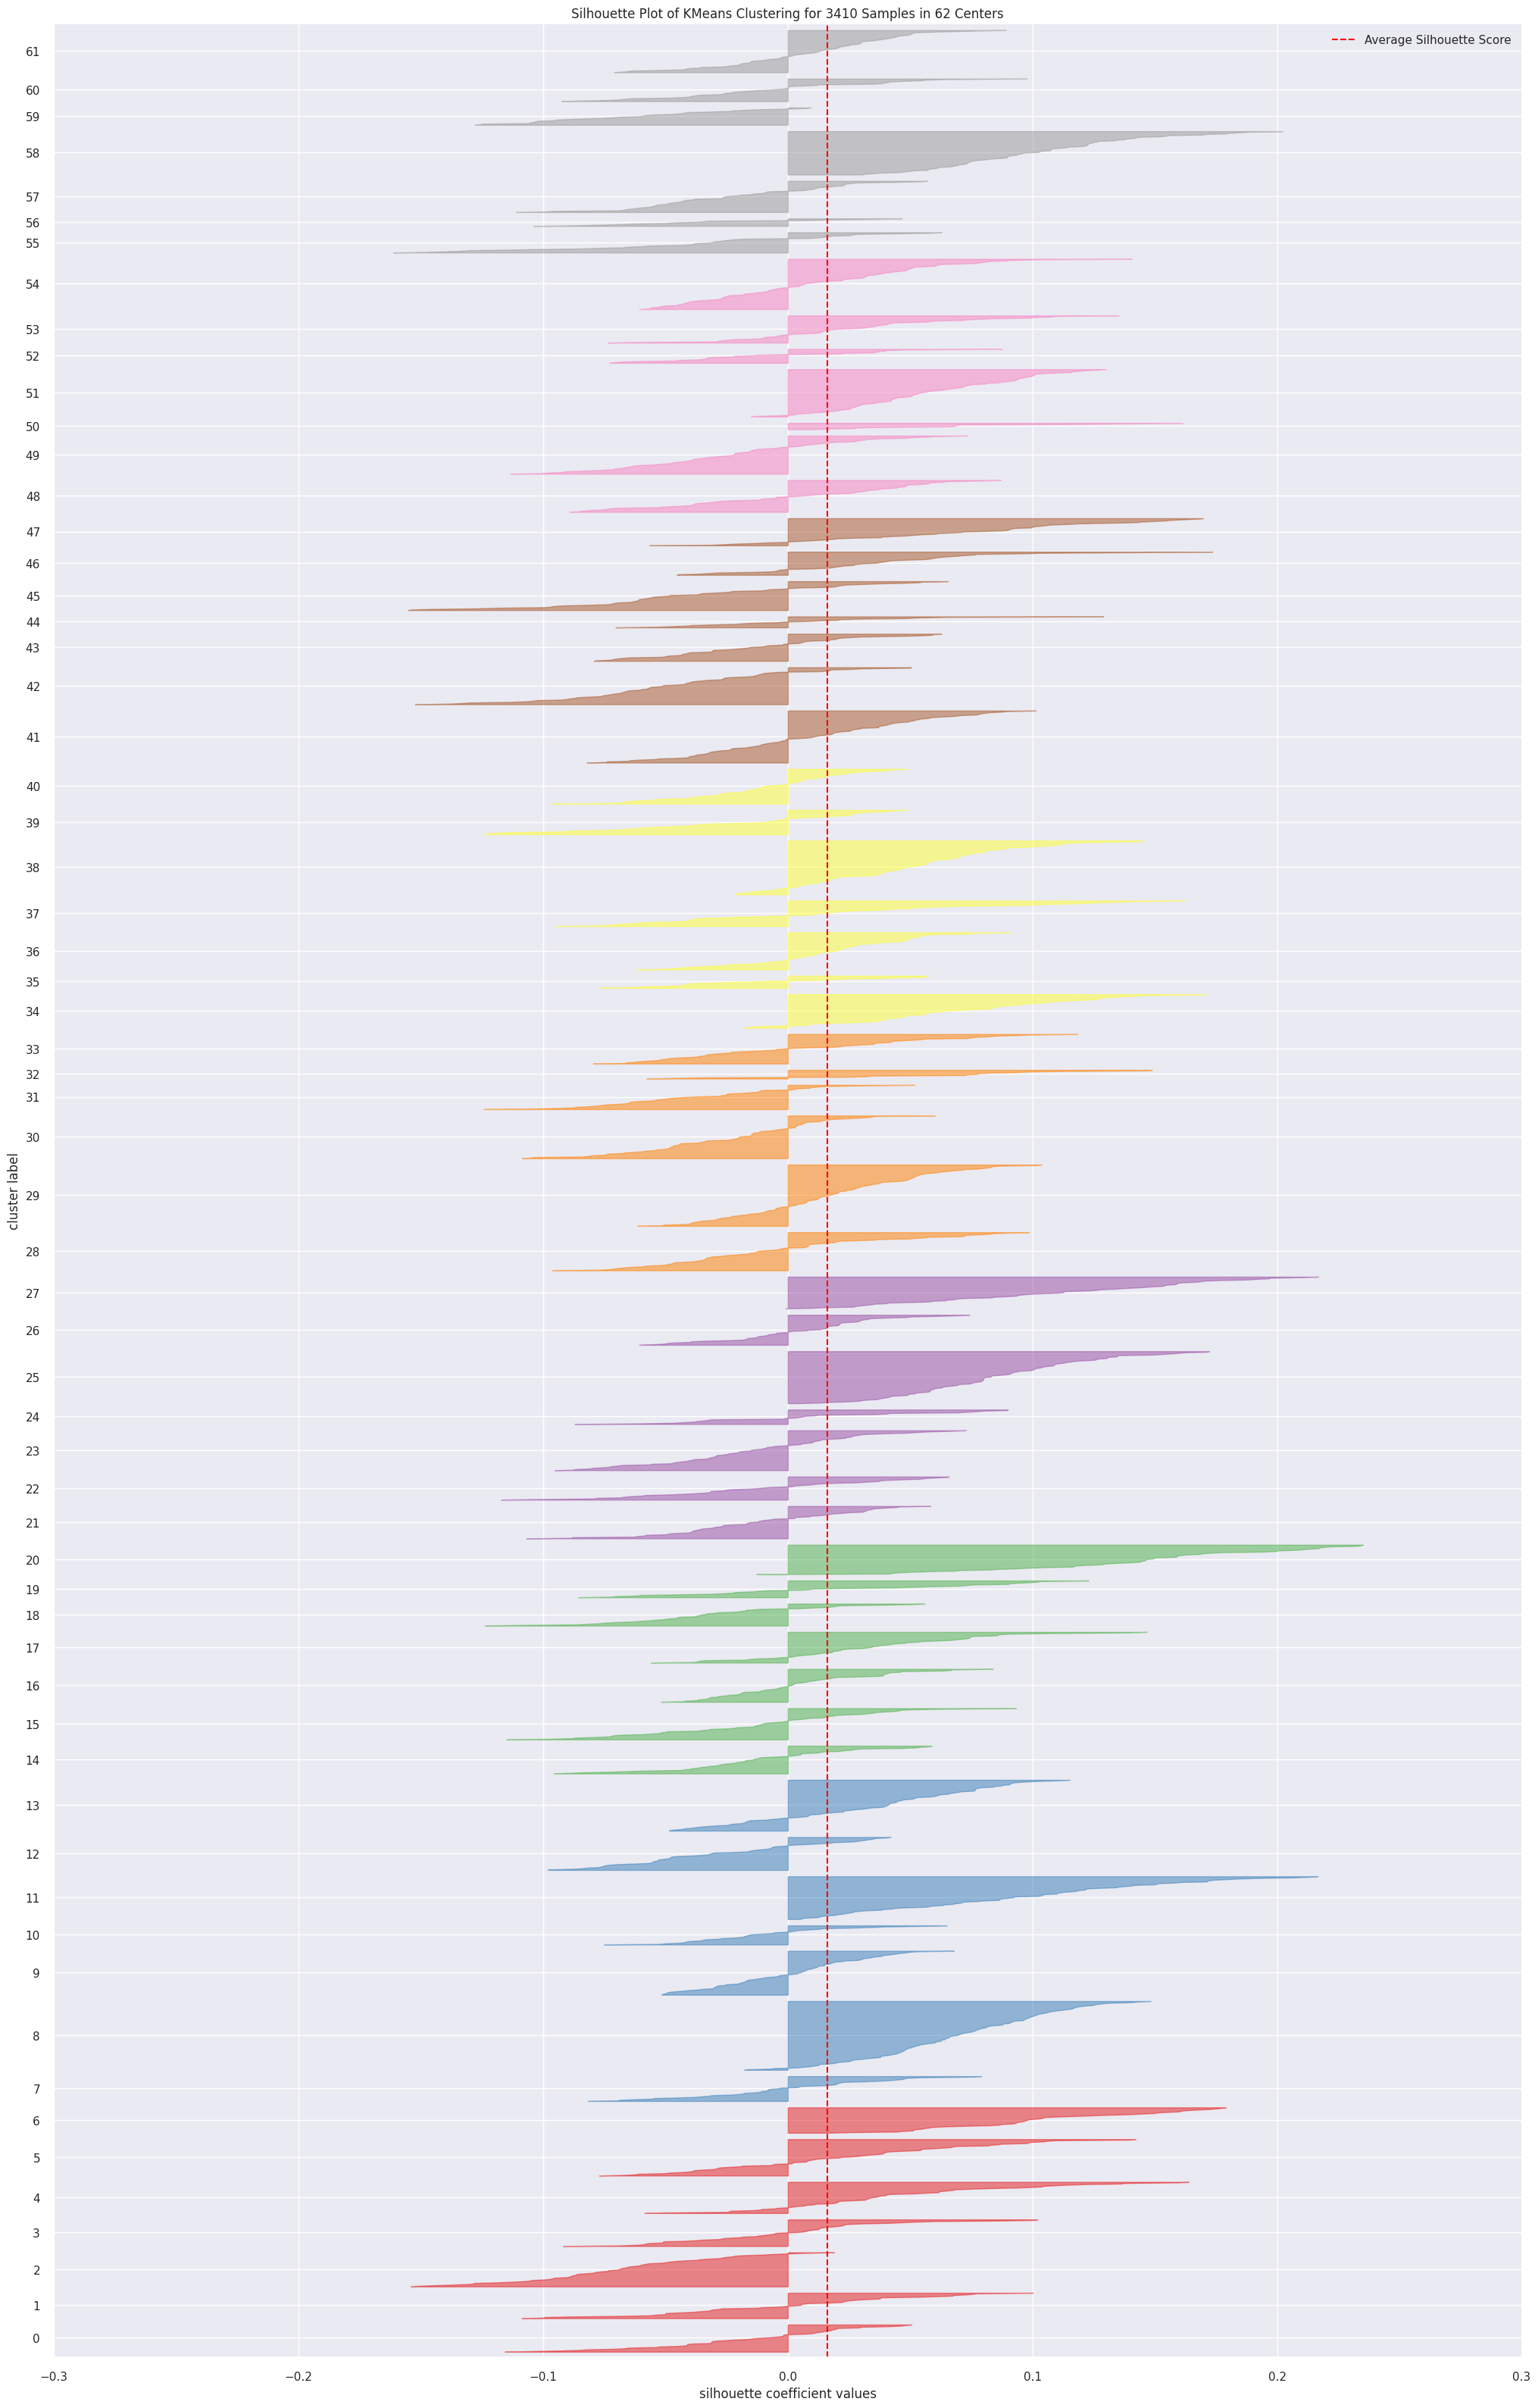

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3410 Samples in 62 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [99]:
from yellowbrick.cluster import SilhouetteVisualizer
fig = plt.figure(figsize=(25,40))
visualizer = SilhouetteVisualizer(estimador,ax=fig.gca())
visualizer.fit(treinoFeatures)
visualizer.show()

## 6 - Classificar novas instâncias

In [100]:
from PIL import ImageTk, Image, ImageDraw, ImageOps
import PIL
from tkinter import ttk
from tkinter import *
import tkinter as tk
import cv2
import matplotlib.pyplot as plt
from typing import Tuple

In [108]:
def run_test(model):
    width = 100 # canvas width
    height = 100 # canvas height
    center = height//2
    white = (255, 255, 255) # canvas back

    LARGE_FONT= ("Verdana", 12)
    NORM_FONT= ("Verdana", 10)
    SMALL_FONT= ("Verdana", 8)

    def classify():
        image = np.array(output_image)
        grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        cropped = zoom(resize_with_pad(grey_image, (100,100)), 1.5)[25:125,25:125]
        a_image = np.array(cropped).flatten()
        prediction = model.predict([a_image])
        response = f'Dígito identificado: {prediction}'
        popupmsg(response)

    def new_drawing():
        canvas.delete('all')

    def resize_with_pad(image: np.array, 
                        new_shape: Tuple[int, int], 
                        padding_color: Tuple[int] = (255, 255, 255)):
        original_shape = (image.shape[1], image.shape[0])
        ratio = float(max(new_shape))/max(original_shape)
        new_size = tuple([int(x*ratio) for x in original_shape])
        image = cv2.resize(image, new_size)
        delta_w = new_shape[0] - new_size[0]
        delta_h = new_shape[1] - new_size[1]
        top, bottom = delta_h//2, delta_h-(delta_h//2)
        left, right = delta_w//2, delta_w-(delta_w//2)
        image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=padding_color)
        return image

    def zoom(img, zoom_factor=1.2):
        return cv2.resize(img, None, fx=zoom_factor, fy=zoom_factor)

    def popupmsg(msg):
        popup = tk.Tk()
        popup.wm_title("Você digitou:")
        label = ttk.Label(popup, text=msg, font=NORM_FONT)
        label.pack(side="top", fill="x", pady=10)
        B1 = ttk.Button(popup, text="Okay", command = popup.destroy)
        B1.pack()
        popup.mainloop()

    def paint(event):
        x1, y1 = (event.x - 1), (event.y - 1)
        x2, y2 = (event.x + 1), (event.y + 1)
        canvas.create_oval(x1, y1, x2, y2, fill="black",width=5)
        draw.line([x1, y1, x2, y2],fill="black",width=5)

    master = tk.Tk()

    # criar um canvas do tkinder para o desenho
    canvas = Canvas(master, width=width, height=height, bg='white')
    canvas.pack()

    # criar uma imagem PIL vazia e desenhenar o objeto
    output_image = PIL.Image.new("RGB", (width, height), white)
    draw = ImageDraw.Draw(output_image)
    canvas.pack(expand=YES, fill=BOTH)
    canvas.bind("<B1-Motion>", paint)

    # botões para a classificação e para limpar o desenho e inciar um novo
    button=Button(text="Classificar",command=classify)
    button.pack()

    button2=Button(text="Limpar",command=new_drawing)
    button2.pack()

    master.mainloop()

def collect_data(path):
    conjuntoDados = pd.read_csv('letter_data.csv', low_memory=False)
    conjuntoDados.drop(columns='Unnamed: 0', inplace=True)
    conjuntoDados.label = conjuntoDados.label.astype(str)
    return conjuntoDados

def split_data(df):
    training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)
    treinoFeatures,treinoClasses = training_data.drop(columns='label').values, training_data['label'].values
    testeFeatures,testeClasses = testing_data.drop(columns='label'), testing_data['label'].values
    return treinoFeatures, treinoClasses, testeFeatures, testeClasses 


def prepare_test(df, model, params:dict,subset:int = 0):
    maiusculas = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
    minusculas = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    numeros = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

    if subset == 1:
        df = df[df['label'].isin(maiusculas)].copy()
        print('Reconhecimento de letras maiúsculas')
        print(f'{len(df)} exemplos')
    elif subset == 2:
        df = df[df['label'].isin(minusculas)].copy()
        print('Reconhecimento de letras minúsculas')
        print(f'{len(df)} exemplos')
    elif subset == 3:
        df = df[df['label'].isin(numeros)].copy()
        print('Reconhecimento de números')
        print(f'{len(df)} exemplos')
    elif subset == 0:
        df = df.copy()
        print('Reconhecimento de qualquer dígito')
        print(f'{len(df)} exemplos')
    else:
        print('Escolha uma categoria de algarismos para treinar o modelo:')
        print('1 - Maiúsculas\n2- Minúsculas\n3 - Números\n0 - Todos os dígitos')
    
    treinoFeatures, treinoClasses, testeFeatures, testeClasses = split_data(df)

    model_ = model(**params)
    model_.fit(treinoFeatures,treinoClasses)
    print ('Acurácia:', metrics.accuracy_score(testeClasses,model_.predict(testeFeatures)).round(3), '\n')
    return model_

In [109]:
import warnings
warnings.simplefilter('ignore')

path = 'letter_data.csv'
params = {'C': 0.1, 'gamma': 1,'kernel': 'poly'}
model = SVC

df = collect_data(path)

model_mai = prepare_test(df, model, params, subset=1)
model_min = prepare_test(df, model, params, subset=2)
model_num = prepare_test(df, model, params, subset=3)
model_all = prepare_test(df, model, params, subset=0)

Reconhecimento de letras maiúsculas
1430 exemplos
Acurácia: 0.612 

Reconhecimento de letras minúsculas
1430 exemplos
Acurácia: 0.409 

Reconhecimento de números
550 exemplos
Acurácia: 0.582 

Reconhecimento de qualquer dígito
3410 exemplos
Acurácia: 0.428 



In [110]:
run_test(model_mai)